0-set-up-ibmq-account.ipynb will walk you through how to set up and IBM Quantum account so you can use their systems to run quantum circuits on simulators and quantum computers.

Last Updated: 08/08/2023 \
by Amanda Bowman

<sub>Note: Qiskit is updated frequently and the method to set up or load an IBMQ account may have changed since this document was last updated.</sub>

# Setting up an account with IBM Quantum Experience

## 1 Setting up an IBMQ account
IBM provided a [YouTube video](https://www.youtube.com/watch?v=1kRfHNUbkrg&t=0s) on how to set up an account with IBMQ. I reccomend watching the video and using this notebook to run the commands referenced in the video.

### 1.1 Setting up IBMQ Account on the Cloud

#### 1.1.1 Navitage to the [IBM Quantum Webpage](https://quantum-computing.ibm.com/) and follow the instructions to create an account.

### 1.2 Setting up IBMQ Account Locally

#### Check Python version

Check [Qiskit documentation](https://qiskit.org/documentation/getting_started.html) to see which versions of Python are supported.

Then check if you have the version of Python you want installed:

In [1]:
conda info


     active environment : base
    active env location : /Users/Mandy/opt/anaconda3
            shell level : 1
       user config file : /Users/Mandy/.condarc
 populated config files : /Users/Mandy/.condarc
          conda version : 23.7.2
    conda-build version : 3.20.5
         python version : 3.8.5.final.0
       virtual packages : __archspec=1=x86_64
                          __osx=10.16=0
                          __unix=0=0
       base environment : /Users/Mandy/opt/anaconda3  (writable)
      conda av data dir : /Users/Mandy/opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/Mandy/opt/anaconda3/pkgs
                          /Users/Mandy/.conda/pkgs
       envs directories 

Install new Python version if you don't have the version you want.

Replace \<version\> with the version of Python you want to use. 

In [ ]:
conda install python=<version>

#### 1.2.1 Create a virtual environemnt with Anaconda and install Python

<sub>Read [this webpage](https://csguide.cs.princeton.edu/software/virtualenv) to learn about virtual environments and why you should use them.</sub>

Replace \<name-of-environment\> with your chosen name for the new virtual environemnt.

Replace \<version\> with the version of Python you want to use. 

In [2]:
conda create -n <name-of-environment> python=<version> anaconda

zsh:1: no such file or directory: name-of-environment

Note: you may need to restart the kernel to use updated packages.


#### 1.2.3 Install Qiskit into virtual environment

In [3]:
pip install qiskit

#### 1.2.4 Store account information

In [7]:
import qiskit
from qiskit import IBMQ

Replace \<API token\> with your API token which you can find on the [IBM Quantum Webpage](https://quantum-computing.ibm.com/).

In [ ]:
IBMQ.save_account(‘<API token>’)

#### 1.2.5 Load account

In [9]:
IBMQ.load_account()

/var/folders/tb/t8qqy0cj4qsgf1zcbpdjb1940000gp/T/ipykernel_11042/485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### 1.3 IBMQ Backends

You can run your quantum circuits on simulators or real quantum hardware provided by IBMQ.

You can see the backends (simulators and quantum computers) available to you [here](https://quantum-computing.ibm.com/services/resources?tab=yours).

You can also see the backends (quantum computers) through the command line:

In [10]:
from qiskit.tools.monitor import backend_overview 
backend_overview()

ibm_perth                    ibm_nairobi                  ibm_lagos
---------                    -----------                  ---------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 92             Pending Jobs: 138            Pending Jobs: 1515
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      143.5          Avg. T1:      111.9          Avg. T1:      145.4
Avg. T2:      118.6          Avg. T2:      80.1           Avg. T2:      72.2



ibmq_manila                  ibmq_jakarta                 ibmq_quito
-----------                  ------------                 ----------
Num. Qubits:  5              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 1390           Pending Jobs: 1231           Pending Jobs: 39
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operati

## 2 Running a quantum circuit

In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

### 2.1 Setting up the quantum circuit

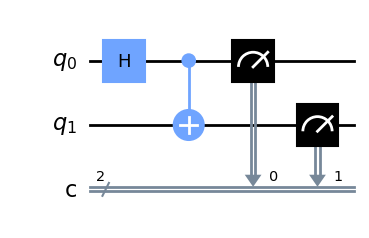

In [4]:
circuit = QuantumCircuit(2,2)

circuit.h(0)
circuit.cx(0, 1)
circuit.measure(0,0)
circuit.measure(1,1)

%matplotlib inline
circuit.draw(output='mpl')

### 2.2 Run circuit using a simulator

https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html

https://learn.qiskit.org/summer-school/2022/methods-quantum-simulation

#### 2.2.1 Load backend

In [16]:
backend_sim = Aer.get_backend('qasm_simulator')

#### 2.2.2 Run the circuit

In [17]:
result_sim = execute(circuit, backend=backend_sim, shots = 1024).result()

#### 2.2.3 Get the results

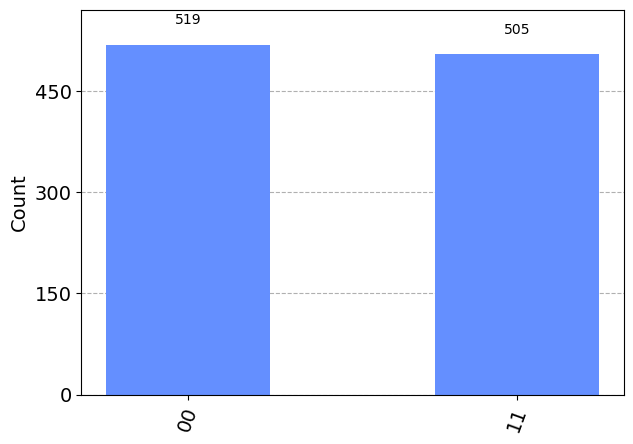

In [18]:
counts_sim = result_sim.get_counts()
plot_histogram(counts_sim)

### 2.3 Run circuit using a quantum computer

#### 2.3.1 Load backend

In [21]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend_qc = provider.get_backend('ibmq_belem')

#### 2.3.2 Run the circuit

In [22]:
job = execute(circuit, backend=backend_qc)

#### 2.3.3 Monitoring a Job

From command line:

In [ ]:
job_monitor(job)

Job Status: job is queued (None)

From IBMQ Page:

https://quantum-computing.ibm.com/jobs

#### 2.3.4 Getting the results

From command line:

In [ ]:
result_qc = job.result()
counts_qc = result_qc.get_counts(circuit)
plot_histogram(counts_qc)

From IBMQ Webpage:

1. Natigate to https://quantum-computing.ibm.com/jobs
2. Double click on the job you want to see

## 3 Resources

Textbook and Tutorials for Qiskit - https://qiskit.org/learn/

IBM Quantum - https://quantum-computing.ibm.com/

GitHub - https://github.com/Qiskit

Videos - https://www.youtube.com/@qiskit/playlists
